# WeatherPy
----

## Observable Trends
* There is a moderate negative correlation between latitude and maximum temperature. This means that as the latitude increases, moving up into the northern hemisphere, the maximum temperature decreases correspondingly. Also, as expected, the maximum temperature increases as the cities approach the equator.  

* There does not appear to be any correlation between latitude and humidity, neither does there appear to be any strong correlation between latitude and cloudiness or latitude and windspeed. This indicates that the londitudal differences are likely responsible for the differences in these variables in cities at similar latitudes.

* Despite the lack of strong correlation, it does seem that wind speeds are higher in the more northern and southern latitudes. The outliers occuring at the extremes of each hemisphere. 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -161.76,
        "lat": 60.79
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 42.8,
        "pressure": 1024,
        "humidity": 75,
        "temp_min": 42.8,
        "temp_max": 42.8
    },
    "visibility": 16093,
    "wind": {
        "speed": 9.17,
        "deg": 300
    },
    "clouds": {
        "all": 75
    },
    "dt": 1570398816,
    "sys": {
        "type": 1,
        "id": 7840,
        "message": 0.0077,
        "country": "US",
        "sunrise": 1570381525,
        "sunset": 1570421077
    },
    "timezone": -28800,
    "id": 5880568,
    "name": "Bethel",
    "cod": 200
}


In [28]:
print(requests.get(query_url + city))

<Response [200]>


In [29]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
 # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Killam
Processing Record 2 | Vaini
Processing Record 3 | Fairbanks
Processing Record 4 | Bahir Dar
Processing Record 5 | Lufilufi
Processing Record 6 | New Norfolk
Processing Record 7 | Butaritari
City not found. Skipping...
Processing Record 8 | Rikitea
Processing Record 9 | Bluff
Processing Record 10 | Itarema
Processing Record 11 | Launceston
Processing Record 12 | Qaanaaq
Processing Record 13 | Sitka
Processing Record 14 | Atuona
Processing Record 15 | Rio Gallegos
Processing Record 16 | Tongren
Processing Record 17 | Manta
Processing Record 18 | Ushuaia
Processing Record 19 | Carnarvon
Processing Record 20 | Port Alfred
Processing Record 21 | Kaka
Processing Record 22 | Hobart
Processing Record 23 | Kuhdasht
Processing Record 24 | Nikolskoye
Processing Record 25 | Mataura
Processing Record 26 | Barrow
Processing Record 27 | Port Elizabeth
Processing Record 28 | Corinto
Processing Record 29 | Ancud
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               524
Country            524
Date               524
Latitude           524
Longitude          524
Max Temperature    524
Humidity           524
Cloudiness         524
Wind Speed         524
dtype: int64

In [31]:
# Display DataFrame
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Killam,CA,1570398817,52.79,-111.86,55.91,41,0,14.14
1,Vaini,IN,1570398817,15.34,74.49,73.50,94,32,1.72
2,Fairbanks,US,1570398704,64.84,-147.72,34.00,86,90,5.82
3,Bahir Dar,ET,1570398818,11.59,37.39,56.06,90,100,3.96
4,Lufilufi,WS,1570398818,-13.87,-171.60,89.60,59,75,11.41


In [32]:
# Export & Save Data Into a .csv.
weather_data.to_csv("weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

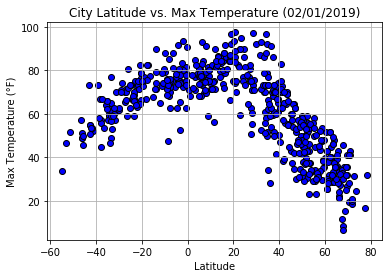

In [33]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (02/01/2019)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

#### Latitude vs. Humidity Plot

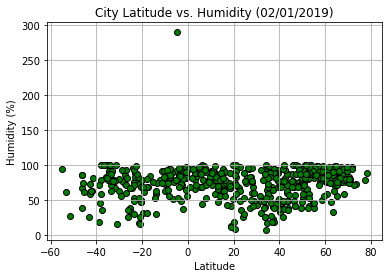

In [34]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="green", marker="o", edgecolor="black")
# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity (02/01/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

#### Latitude vs. Cloudiness Plot

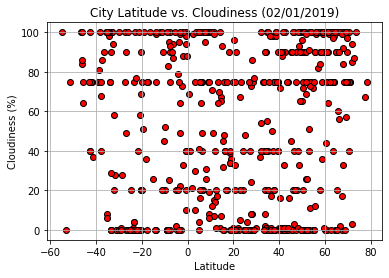

In [35]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="red", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness (02/01/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

#### Latitude vs. Wind Speed Plot

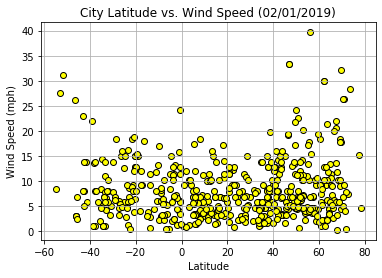

In [36]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (02/01/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()